<a href="https://colab.research.google.com/github/SebastianRodriguez05/SyS/blob/main/Sol_ntb_Transformada_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios

1. Descargue 10 segundos de la canción de su preferencia desde youtube, y generé un filtro pasabanda (el usuario debe poder definir las frecuencias de corte) para cada uno de los filtros descritos (el usuario también debe poder fijar los parámetros de diseño de cada filtro). Compare los resultados de los filtros estudiados en este cuaderno tipo IIR para diseño Butterworth, Chebyshev 1, Chebyshev 2, Bessel y Elíptico.



In [ ]:
! pip install yt-dlp
#!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz


!pip install soundfile

# para instalar pip install soundfile

#librerias
from IPython.display import Audio
import soundfile as sf


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.9/171.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.7 MB/s eta 0:00:00


In [ ]:
link="https://youtu.be/983zfhMym8Q?syi=7QU151oYRD_tJSa4"
!yt-dlp --extract-audio -o "audio" --audio-format mp3 {link}

!ffmpeg -i audio.mp3 out.wav
#lee archivos wav
nombre_out = "out.wav"
x, fs = sf.read(nombre_out)



[youtube] Extracting URL: https://youtu.be/983zfhMym8Q?syi=7QU151oYRD_tJSa4
[youtube] 983zfhMym8Q: Downloading webpage
[youtube] 983zfhMym8Q: Downloading tv client config
[youtube] 983zfhMym8Q: Downloading player c548b3da
[youtube] 983zfhMym8Q: Downloading tv player API JSON
[youtube] 983zfhMym8Q: Downloading ios player API JSON
[youtube] 983zfhMym8Q: Downloading m3u8 information
[info] 983zfhMym8Q: Downloading 1 format(s): 251
[download] Destination: audio
[download] 100% of    3.37MiB in 00:00:00 at 22.85MiB/s
[ExtractAudio] Destination: audio.mp3
Deleting original file audio (pass -k to keep)
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libas

In [ ]:
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

x.shape[0]/fs #segundos de la canción

xpro = x.copy() #copiar archivos para procesar
ti = 30
tf = 50
xs = xpro[int(ti*fs):int((tf*fs)),:]

#Para escuchar el trozo de audio con el que se va a trabajar:
#No usar un trozo muy grande o el entorno se puede desconectar

Audio([xs[:,1], xs[:,0]],rate=fs)

Frecuencia de muestreo 48000.00[Hz]
audio out.wav


Ingrese la frecuencia de corte baja (Hz): 1000
Ingrese la frecuencia de corte alta (Hz): 4000
seleccione el tipo de filtro que desea para la señal:
 0.Butterworth
 1.Chebyshev 1
 2.Chebyshev 2
 3.eliptico
 4.Bessel
 5.Firwim
5


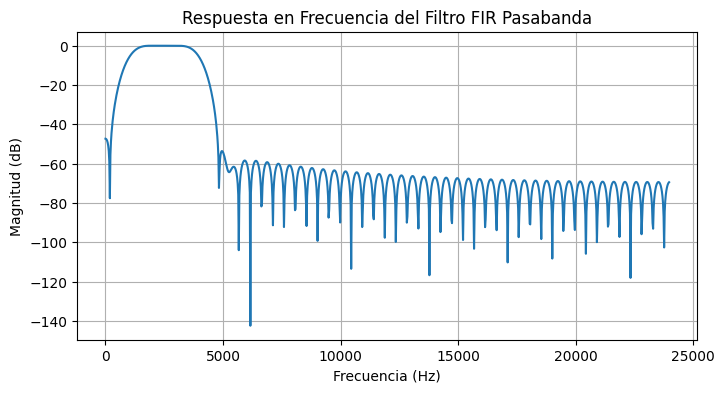

In [ ]:
from scipy.signal import butter, cheby1,cheby2, ellip, bessel, firwin
from scipy.signal import freqz_zpk, freqz
import matplotlib.pyplot as plt
import numpy as np

def plot_freq_response(filter_name, w, h, N): #Mostrar la respuesta en frecuencia del filtro
  fig = plt.figure()
  ax1 = fig.add_subplot(1, 1, 1)
  ax1.set_title(filter_name +' Digital filter frequency response, order= ' + str(N))
  ax1.plot(w, 20 * np.log10(abs(h)), 'b')
  ax1.set_ylabel('Amplitude [dB]', color='b')
  ax1.set_xlabel('Frequency [Hz]')
  ax1.grid()
  ax2 = ax1.twinx()
  angles = np.unwrap(np.angle(h))
  ax2.plot(w, angles, 'g')
  ax2.set_ylabel('Angle [radians]', color='g')
  plt.axis('tight')
  plt.show()



def bandpass_filter(fs, fmin, fmax, design):
  Wn=[fmin,fmax]
  filt='bandpass'
  if design == 0:
    #butterworth
    type_f = 'Butterworth'
    N=1
    out='zpk'
    zeros, poles, gain = butter(N, Wn, btype=filt, output=out, fs=fs)
    w, h = freqz_zpk(zeros, poles, gain, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 1:
    #Chebyshev 1
    type_f = 'Chebyshev 1'
    ripple = 10
    N= 4
    out='zpk'
    zeros, poles, gain = cheby1(N, rp=ripple, Wn=Wn,btype=filt, output=out, fs=fs)
    w, h = freqz_zpk(zeros, poles, gain, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 2:
    #Chebyshev 2
    N = 4
    type_f = 'Chebyshev 2'
    ripple = 10
    out='ba'
    num, den = cheby2(N, rs=ripple, Wn=Wn,btype=filt, output=out, fs=fs)
    w, h = freqz(num,den, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 3:
    #eliptico
    N = 4
    type_f = 'eliptico'
    out='ba'
    ripple_pass = 2 #para la banda pasante
    ripple_stop = 30 #para la banda rechazada
    num, den = ellip(N, rp=ripple_pass, rs=ripple_stop, Wn=Wn, btype=filt, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
    w, h = freqz(num, den, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design==4:
    #bessel
    type_f = 'Bessel'
    N = 4
    normalization = 'mag' #Ajusta la frecuencia crítica según la respuesta que se desea
    out = 'ba'
    num, den = bessel(N, Wn=Wn, btype=filt, norm=normalization, output=out, fs=fs) #regresa numerador y denominador. Si se quiere obtener los polos y ceros usar scipy.signal.tf2zpk
    w, h = freqz(num, den, fs=fs)
    plot_freq_response(type_f, w, h, N)

  elif design == 5:
    #firwin
    type_f = 'FIRWIN'
    numtaps = 101  # Número de coeficientes del filtro (orden + 1)
    b = firwin(numtaps, [fmin, fmax], pass_zero=False, fs=fs)
    # Respuesta en frecuencia del filtro
    w, h = freqz(b, worN=1024, fs=fs)
    plt.figure(figsize=(8, 4))
    plt.plot(w, 20 * np.log10(abs(h)))
    plt.title("Respuesta en Frecuencia del Filtro FIR Pasabanda")
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud (dB)")
    plt.grid()
    plt.show()


fc_baja=float(input("Ingrese la frecuencia de corte baja (Hz): "))
fc_alta = float(input("Ingrese la frecuencia de corte alta (Hz): "))
flt_typ=int(input("seleccione el tipo de filtro que desea para la señal:\n 0.Butterworth\n 1.Chebyshev 1\n 2.Chebyshev 2\n 3.eliptico\n 4.Bessel\n 5.Firwim\n"))

bandpass_filter(fs, fc_baja, fc_alta, flt_typ)



2. Consulte en qué consiste el método de diseño de filtros FIR por ventaneo (Ver función [firwin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) y [material de apoyo](https://www.programcreek.com/python/example/100540/scipy.signal.firwin)). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR. Nota: Recuerde que un filtro FIR utiliza solamente raíces tipo ceros, es decir que $a_0=1$, y $a_k=0$ $\forall k\in\{1,2,\dots\}$.

3. Incluya la implementación del filtro `firwin` en el punto 1.

# **Filtros FIR vs IIR**

| **Característica**        | **Filtros FIR**                                                                                     | **Filtros IIR**                                                                                      |
|---------------------------|-----------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------|
| **Estabilidad**           | Siempre estables, ya que no tienen polos fuera del círculo unitario.                                | Pueden ser inestables si los polos se encuentran fuera del círculo unitario.                         |
| **Respuesta al impulso**  | Finita, se apaga después de un tiempo determinado.                                                  | Infinita, la respuesta puede continuar indefinidamente.                                              |
| **Fase**                  | Pueden diseñarse con fase lineal o cero distorsión de fase, lo cual es útil en audio y comunicaciones. | Generalmente no tienen fase lineal, lo que puede causar distorsión de fase en ciertas aplicaciones.   |
| **Complejidad computacional** | Suelen requerir un orden mayor para lograr una pendiente pronunciada, lo que aumenta el costo computacional. | Menor orden para lograr una respuesta en frecuencia similar, por lo tanto, son más eficientes computacionalmente. |
| **Memoria requerida**     | Necesitan mayor cantidad de coeficientes y memoria para su implementación.                           | Menor uso de memoria debido a la retroalimentación y menor cantidad de coeficientes necesarios.       |
| **Estructura matemática** | Solo tienen ceros (no tienen polos), lo que simplifica su análisis y diseño.                         | Tienen tanto ceros como polos, lo que permite una mayor flexibilidad en el modelado de sistemas.      |
| **Estabilidad numérica**  | Más robustos frente a errores de redondeo en aritmética de punto fijo.                              | Menos robustos numéricamente debido a la retroalimentación, especialmente en punto fijo.              |
| **Aplicaciones típicas**  | Áreas donde la fase lineal es crítica: procesamiento de audio, comunicaciones, sistemas de control. | Aplicaciones que requieren alta selectividad de frecuencia con menor orden, como filtrado analógico digitalizado. |
| **Facilidad de diseño**   | El diseño es generalmente más simple y directo, especialmente con el método de ventaneo.             | El diseño puede ser más complejo, ya que puede involucrar técnicas de transformación de filtros analógicos. |
| **Causalidad**            | Siempre se pueden implementar de forma causal.                                                       | También pueden implementarse de forma causal, pero con más cuidado para evitar la inestabilidad.      |
| **Adaptabilidad**         | Más adecuados para filtros adaptativos debido a su estabilidad inherente.                           | Menos comunes en filtros adaptativos debido al riesgo de inestabilidad.                              |
| **Retardo de grupo**      | Tienen un retardo de grupo constante si se diseñan con fase lineal.                                  | El retardo de grupo no es constante, lo que puede causar distorsión en señales de banda ancha.        |
